# 3 layer LSTM WITHOUT batchnorm, dropout. 30 day input, 7 day forecast

In [1]:
import numpy as np
import pandas as pd
import json
import os
import math
import datetime as dt
import matplotlib.pyplot as plt
from numpy import newaxis
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Dropout, LSTM, CuDNNLSTM, BatchNormalization
from keras.models import Sequential, load_model
from sklearn.metrics import mean_squared_error

import utils
import model_funcs

%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = [16, 9]
%matplotlib inline

Using TensorFlow backend.


In [2]:
save_dir = 'models/lstm1'
df = pd.read_csv('data_25_normalized.csv', index_col='Date')
data = df.values

In [3]:
num_input = 30
num_out = 7
train_X, train_y, dev_X, dev_y, test_X, test_y, y = utils.prepare_data(data, num_input, num_preds=num_out)

print("train_X shape", train_X.shape)
print("train_y shape", train_y.shape)
print("dev_X shape", dev_X.shape)
print("dev_y shape", dev_y.shape)
print("test_X shape", test_X.shape)
print("test_y shape", test_y.shape)

train_X shape (638, 30, 25)
train_y shape (638, 7)
dev_X shape (80, 30, 25)
dev_y shape (80, 7)
test_X shape (80, 30, 25)
test_y shape (80, 7)


In [6]:
if not os.path.exists(save_dir): os.makedirs(save_dir)

input_shape = train_X.shape[1:]
lr = 0.001
decay = 1e-6
dropout_rate = 0.3
epochs = 200
batch_size = 32

model = Sequential()
model.add(
    CuDNNLSTM(
        128,
        input_shape=input_shape,
        return_sequences=True,
    )
)
model.add(Dropout(dropout_rate))

model.add(CuDNNLSTM(128, return_sequences=True))
model.add(Dropout(dropout_rate))

model.add(CuDNNLSTM(128))
model.add(Dropout(dropout_rate))

model.add(Dense(32, activation="relu"))
model.add(Dropout(dropout_rate))

model.add(Dense(num_out, activation="linear"))


opt = Adam(lr=lr, decay=decay)
model.compile(loss="mse", optimizer=opt)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_4 (CuDNNLSTM)     (None, 30, 128)           79360     
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 128)           512       
_________________________________________________________________
cu_dnnlstm_5 (CuDNNLSTM)     (None, 30, 128)           132096    
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 128)           512       
_________________________________________________________________
cu_dnnlstm_6 (CuDNNLSTM)     (None, 128)               132096    
__________

In [7]:
history = model_funcs.train(
    model,
    train_X,
    train_y,
    (dev_X, dev_y),
    epochs = epochs,
    batch_size = batch_size,
    save_dir = save_dir
)

[Model] Training Started
[Model] 200 epochs, 32 batch size
Train on 638 samples, validate on 80 samples
Epoch 1/200
638/638 [==============================] - 2s 3ms/step - loss: 1.0086 - val_loss: 0.2631
Epoch 2/200
638/638 [==============================] - 1s 1ms/step - loss: 0.5336 - val_loss: 0.1100
Epoch 3/200
638/638 [==============================] - 1s 1ms/step - loss: 0.4001 - val_loss: 0.0671
Epoch 4/200
638/638 [==============================] - 1s 1ms/step - loss: 0.2952 - val_loss: 0.0721
Epoch 5/200
638/638 [==============================] - 1s 1ms/step - loss: 0.2492 - val_loss: 0.0368
Epoch 6/200
638/638 [==============================] - 1s 1ms/step - loss: 0.2053 - val_loss: 0.0214
Epoch 7/200
638/638 [==============================] - 1s 1ms/step - loss: 0.1704 - val_loss: 0.0166
Epoch 8/200
638/638 [==============================] - 1s 1ms/step - loss: 0.1474 - val_loss: 0.0117
Epoch 9/200
638/638 [==============================] - 1s 1ms/step - loss: 0.1239 - val_

638/638 [==============================] - 1s 1ms/step - loss: 0.0097 - val_loss: 0.0064
Epoch 81/200
638/638 [==============================] - 1s 1ms/step - loss: 0.0104 - val_loss: 0.0041
Epoch 82/200
638/638 [==============================] - 1s 1ms/step - loss: 0.0102 - val_loss: 0.0064
Epoch 83/200
638/638 [==============================] - 1s 1ms/step - loss: 0.0095 - val_loss: 0.0050
Epoch 84/200
638/638 [==============================] - 1s 1ms/step - loss: 0.0106 - val_loss: 0.0060
Epoch 85/200
638/638 [==============================] - 1s 1ms/step - loss: 0.0110 - val_loss: 0.0051
Epoch 86/200
638/638 [==============================] - 1s 1ms/step - loss: 0.0095 - val_loss: 0.0041
Epoch 87/200
638/638 [==============================] - 1s 1ms/step - loss: 0.0091 - val_loss: 0.0029
Epoch 88/200
638/638 [==============================] - 1s 1ms/step - loss: 0.0108 - val_loss: 0.0037
Epoch 89/200
638/638 [==============================] - 1s 1ms/step - loss: 0.0093 - val_loss: 

Epoch 160/200
638/638 [==============================] - 1s 1ms/step - loss: 0.0078 - val_loss: 0.0069
Epoch 161/200
638/638 [==============================] - 1s 1ms/step - loss: 0.0068 - val_loss: 0.0039
Epoch 162/200
638/638 [==============================] - 1s 1ms/step - loss: 0.0078 - val_loss: 0.0043
Epoch 163/200
638/638 [==============================] - 1s 1ms/step - loss: 0.0069 - val_loss: 0.0070
Epoch 164/200
638/638 [==============================] - 1s 1ms/step - loss: 0.0058 - val_loss: 0.0070
Epoch 165/200
638/638 [==============================] - 1s 1ms/step - loss: 0.0061 - val_loss: 0.0072
Epoch 166/200
638/638 [==============================] - 1s 1ms/step - loss: 0.0071 - val_loss: 0.0055
Epoch 167/200
638/638 [==============================] - 1s 1ms/step - loss: 0.0079 - val_loss: 0.0054
Epoch 168/200
638/638 [==============================] - 1s 1ms/step - loss: 0.0075 - val_loss: 0.0051
Epoch 169/200
638/638 [==============================] - 1s 1ms/step - lo

92


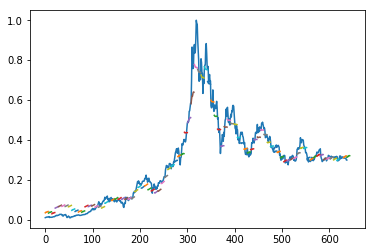

In [13]:
predicted_train = model.predict(train_X)
predicted_train = predicted_train[::num_out]
print(len(predicted_train))
true_train = train_y[:, 0].reshape(-1,1)
utils.plot_results_multiple(predicted_train.tolist(), true_train, num_out)

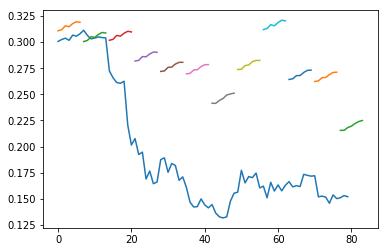

In [9]:
predicted_dev = model.predict(dev_X)
predicted_dev = predicted_dev[::num_out]
true_dev = dev_y[:, 0].reshape(-1,1)
utils.plot_results_multiple(predicted_dev.tolist(), true_dev, num_out)

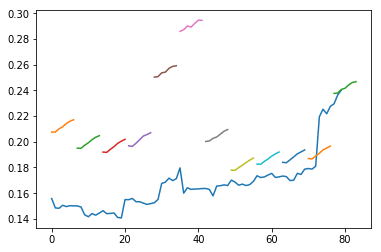

In [10]:
predicted_test = model.predict(test_X)
predicted_test = predicted_test[::num_out]
true_test = test_y[:, 0].reshape(-1,1)
utils.plot_results_multiple(predicted_test.tolist(), true_test, num_out)

In [11]:
print("MSE Train:", mean_squared_error(predicted_train.reshape(-1,1)[:len(true_train)], true_train))
print("MSE Dev:", mean_squared_error(predicted_dev.reshape(-1,1)[:len(true_dev)], true_dev))
print("MSE Test:", mean_squared_error(predicted_test.reshape(-1,1)[:len(true_test)], true_test))

MSE Train: 0.0015876427416754964
MSE Dev: 0.010041895765101491
MSE Test: 0.003366241881669255


In [12]:
print("Acc Train:", utils.direction_accuracy(predicted_train.reshape(-1,1)[:len(true_train)], true_train))
print("Acc Dev:", utils.direction_accuracy(predicted_dev.reshape(-1,1)[:len(true_dev)], true_dev))
print("Acc Test:", utils.direction_accuracy(predicted_test.reshape(-1,1)[:len(true_test)], true_test))

Acc Train: 0.5667189952904239
Acc Dev: 0.46835443037974683
Acc Test: 0.6075949367088608


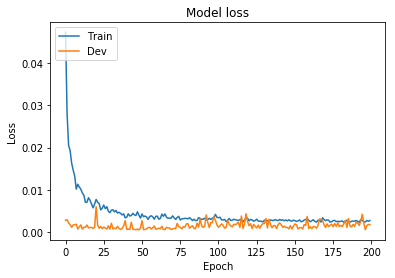

In [30]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Dev'], loc='upper left')
plt.show()